In [31]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import os


class ROI:
  '''
  Identifies the region of interest. 
  '''

  def __init__(self, image_path):
    self.image_path = image_path
    self.image = cv2.imread(self.image_path)
    self.contours = self.find_contours()
    self.image_np = np.array(self.image)
    self.largest_contour = self.detect_grid()
    self.legend = self.detect_color_legend()

  def find_contours(self):

    gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

  def detect_grid(self):
    max_area = 0
    largest_contour = None

    for contour in self.contours:
      area = cv2.contourArea(contour)

      if area > max_area:
        max_area = area
        largest_contour = contour

    return largest_contour
  
  def detect_color_legend(self):
  
    for contour in self.contours:
      area = cv2.contourArea(contour)

      if 1000 < area < 10000:
        #self.draw_bounding_box(contour)
        x, y, width, height = cv2.boundingRect(contour)
        return (x, y, width, height)

  # Display the cropped region of interest
  def draw_bounding_box(self, roi):

    x, y, w, h = cv2.boundingRect(roi)
    cv2.rectangle(self.image_np, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print("Processing bounding box")
    plt.imshow(self.image_np)
    plt.axis('off')
    plt.show()
  
  def detect_title_roi(self):
    
    if self.largest_contour is not None:
      x, y, w, h = cv2.boundingRect(self.largest_contour)
      top = max(0, y - h)
      title_roi = self.image_np[top:y, :]

      return title_roi
  
  def detect_yaxis_roi(self):

    if self.largest_contour is not None:
      x, y, w, h = cv2.boundingRect(self.largest_contour)
      left = max(0, x - w)
      yaxis_roi = self.image_np[y:y + h, left:x]

      return yaxis_roi

  def detect_xaxis_roi(self):

    if self.largest_contour is not None:
      x, y, w, h = cv2.boundingRect(self.largest_contour)
      bottom = min(self.image_np.shape[0], y + 2 * h)
      xaxis_roi = self.image_np[y + h:bottom, x:x + w]

      return xaxis_roi

  def detect_legend_roi(self):

    if self.largest_contour is not None:
      x, y, w, h = cv2.boundingRect(self.largest_contour)
      right = min(self.image_np.shape[1], x + 2 * w)
      legend_roi = self.image_np[y:y + h, x + w:right]

      return (x, y, w, h, right)


class ColorExtractor(ROI):
  '''
  Extracts color in the given image contour
  '''

  def __init__(self, image_path):
    super().__init__(image_path)
    self.image_path = image_path
    self.color_legend = self.detect_color_legend()

  def extract_legend_color(self):
    image = Image.open(self.image_path).convert('RGB')
    image_array = np.array(image)

    x, y, width, height = map(int, self.color_legend)
    legend_roi = image_array[y:y+height, x:x+width]

    unique_colors = []
    for row in legend_roi:
        for color in row:
            if not np.array_equal(color, [0, 0, 0]) and not any(np.array_equal(color, c) for c in unique_colors):
                unique_colors.append(color)

    unique_colors = np.array(unique_colors)

    plt.figure(figsize=(10, 2))
    plt.imshow([unique_colors], aspect='auto')
    plt.title(self.image_path)
    plt.axis('off')
    plt.show()

  def extract_gridcells_color(self):
    pass


class TextExtraction(ColorExtractor):
  '''
  Extracts the text in the given region of interest.
  '''
  def __init__(self, image_path):
    super().__init__(image_path)
    self.image_path = image_path
    self.img = cv2.imread(image_path)
    self.legend_color = self.extract_legend_color()
    self.title_roi = self.detect_title_roi()
    self.yaxis_roi = self.detect_yaxis_roi()
    self.xaxis_roi = self.detect_xaxis_roi()
    self.legend_roi = self.detect_legend_roi()

  def extract_title(self):
    title_text = pytesseract.image_to_string(self.title_roi)
    print("Extracted title text:", title_text)
    return title_text

  def extract_yaxis_labels(self):
    yaxis_text = pytesseract.image_to_string(self.yaxis_roi)
    print("Extracted y-axis labels text:", yaxis_text)
    return yaxis_text

  def extract_xaxis_labels(self):
    xaxis_text = pytesseract.image_to_string(self.xaxis_roi)
    print("Extracted x-axis labels text:", xaxis_text)
    return xaxis_text

  def extract_legend_values(self):
    self.remove_legend()
    legend_text = pytesseract.image_to_string(self.legend_roi)
    print("Extracted legend text:", legend_text)
    return legend_text
  
  def remove_legend(self):
    legend_roi_coords = self.detect_legend_roi()
    if legend_roi_coords is not None:
      x, y, w, h, right = legend_roi_coords
      # Set the legend ROI to black
      self.image_np[y:y + h, x + w:right] = 0
      print("Legend removed.")
    else:
      print("Legend ROI not found.")


class GridProcessor:
  pass


class ColorMapping(TextExtraction, GridProcessor):
  
  def __init__(self, image_path):
    super.__init__(self, image_path)
    pass

  def map_legend_values(self):
    pass

  def map_gridcells_values(self):
    pass
  


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

Processing file: D:\encoder-tool\generated-heatmaps\Industrial_design_applications__nonresident__by_count.png


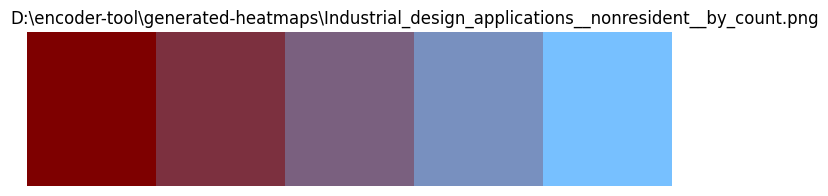

Processing file: D:\encoder-tool\generated-heatmaps\Industry___of_GDP_.png


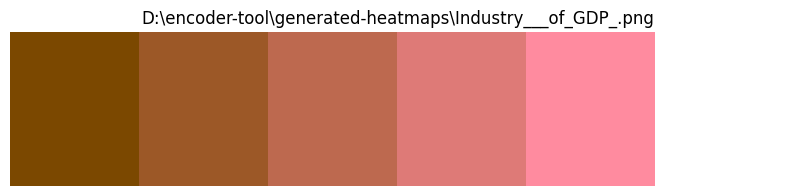

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added____of_GDP_.png


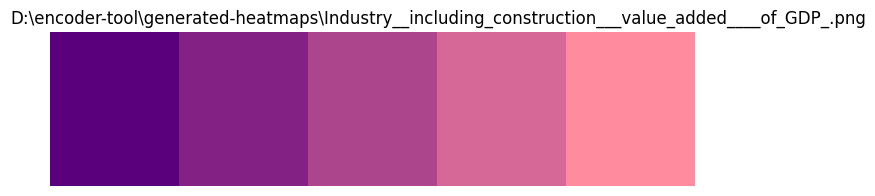

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added__annual___growth_.png


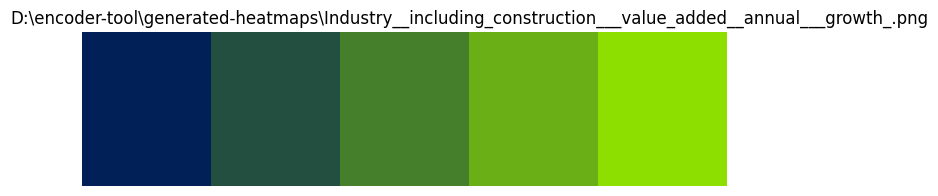

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added__constant_2015_US__.png


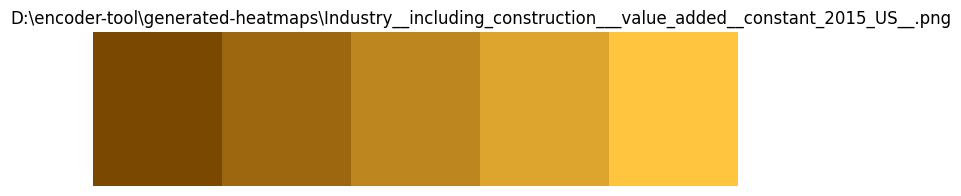

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added__constant_LCU_.png


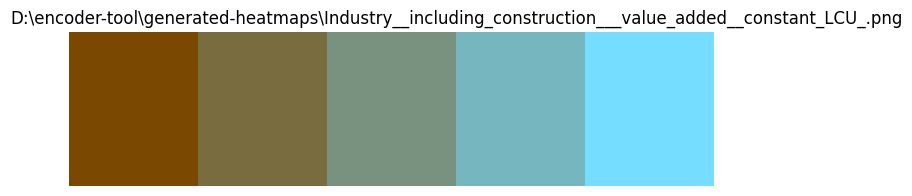

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added__current_LCU_.png


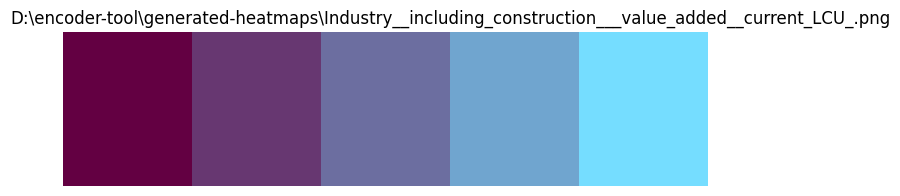

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added__current_US__.png


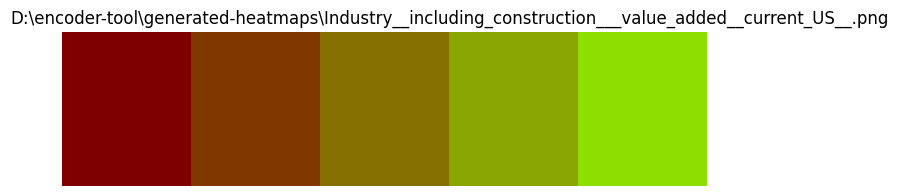

Processing file: D:\encoder-tool\generated-heatmaps\Industry__including_construction___value_added_per_worker__constant_2015_US__.png


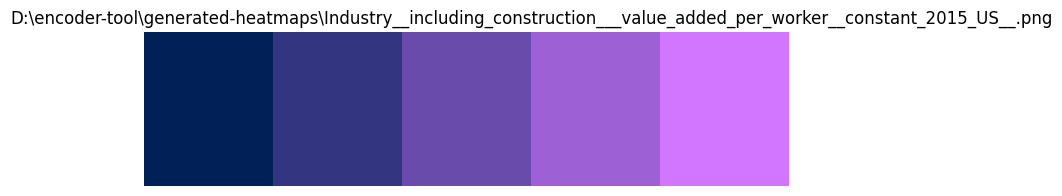

Processing file: D:\encoder-tool\generated-heatmaps\Intentional_homicides__male__per_100_000_male_.png


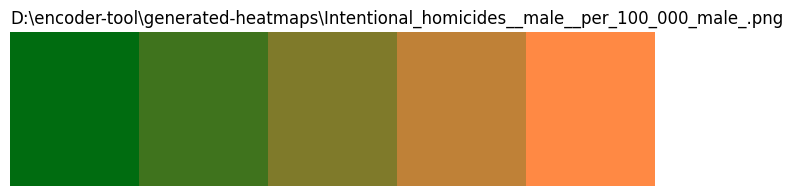

Processing file: D:\encoder-tool\generated-heatmaps\Interest_payments____of_revenue_.png


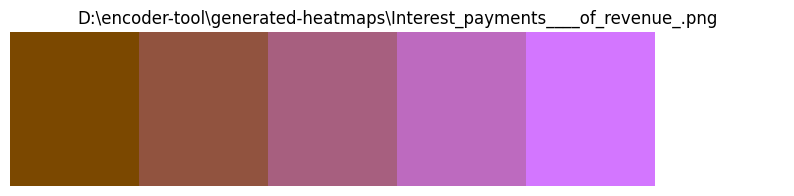

Processing file: D:\encoder-tool\generated-heatmaps\International_refugees_by_country_of_asylum__csv.png


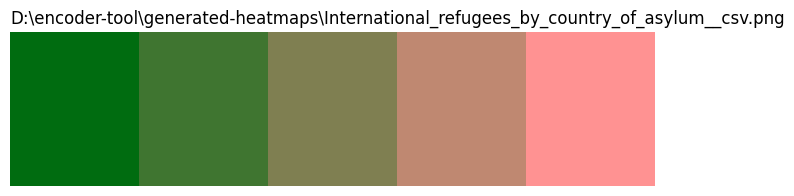

Processing file: D:\encoder-tool\generated-heatmaps\International_tourism__expenditures__current_US__.png


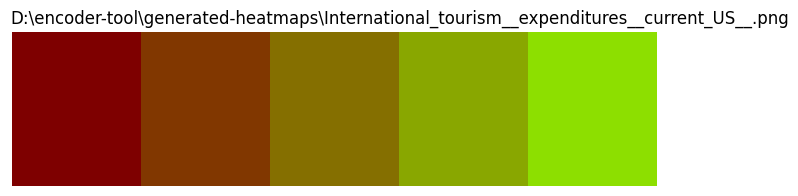

Processing file: D:\encoder-tool\generated-heatmaps\International_tourism__receipts_for_passenger_transport_items__current_US__.png


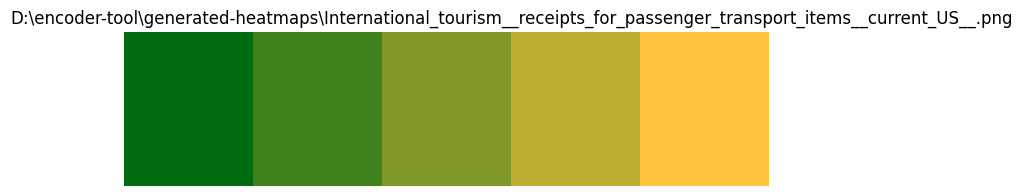

Processing file: D:\encoder-tool\generated-heatmaps\Labor_force_participation_rate__total____of_total_population_ages_15____national_estimate_.png


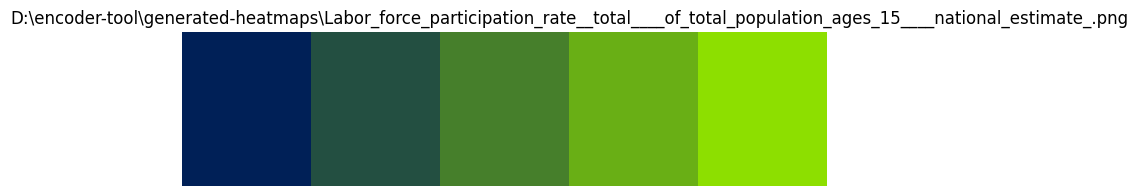

Processing file: D:\encoder-tool\generated-heatmaps\Labor_force_with_advanced_education__male____of_male_working_age_population_with_advanced_education_.png


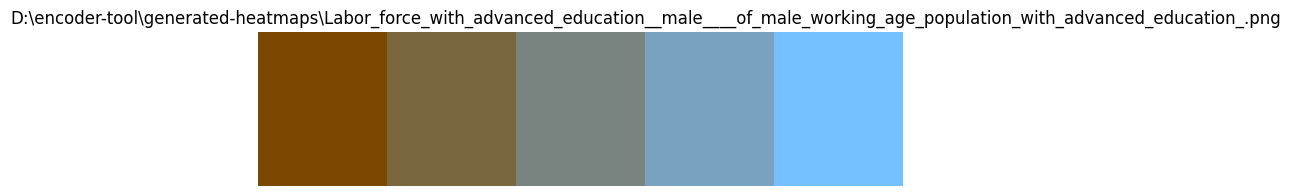

Processing file: D:\encoder-tool\generated-heatmaps\Labor_force_with_basic_education__male____of_male_working_age_population_with_basic_education_.png


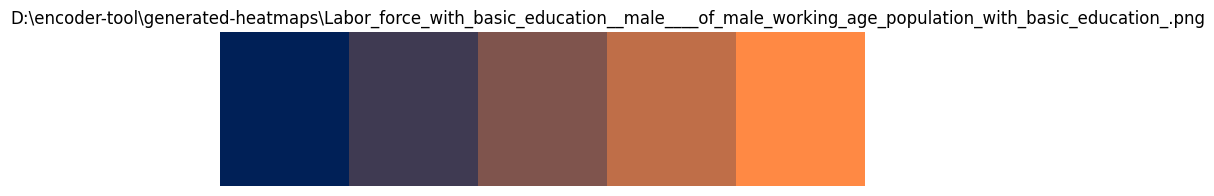

Processing file: D:\encoder-tool\generated-heatmaps\Machinery_and_transport_equipment____of_value_added_in_manufacturing_.png


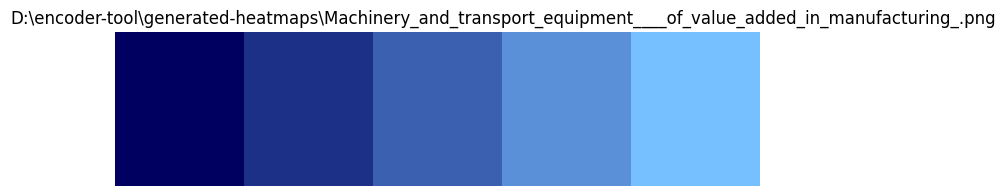

Processing file: D:\encoder-tool\generated-heatmaps\Malaria_cases_per_100_000___reported.png


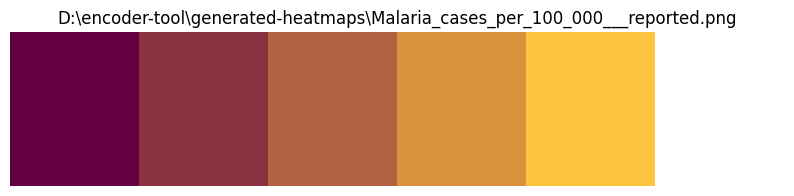

Processing file: D:\encoder-tool\generated-heatmaps\Male_long_term_unemployment_rate____.png


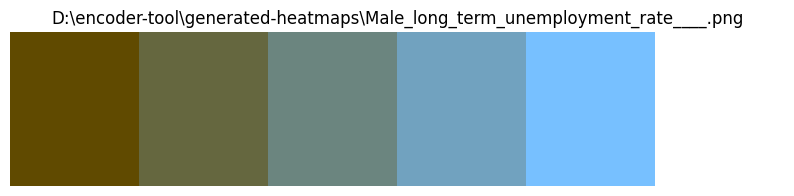

Processing file: D:\encoder-tool\generated-heatmaps\Male_salaried_workers____of_male_employment_.png


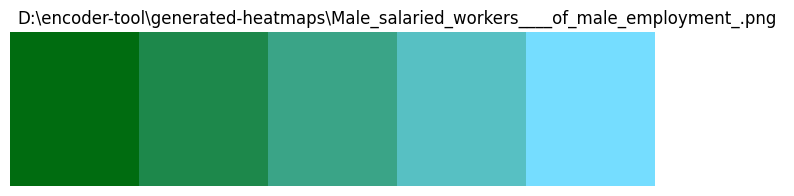

Processing file: D:\encoder-tool\generated-heatmaps\Manufactures_exports____of_merchandise_exports_.png


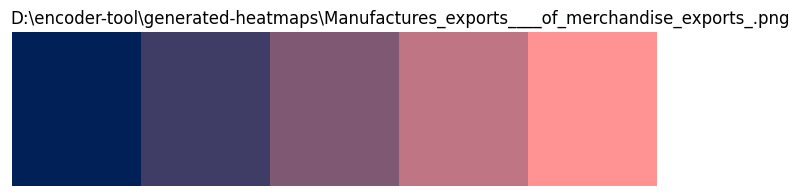

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_one_year_olds_who_are_vaccinated_against_BCG__DTP3__HepB3_HIB3__MCV1_and_Pol3.png


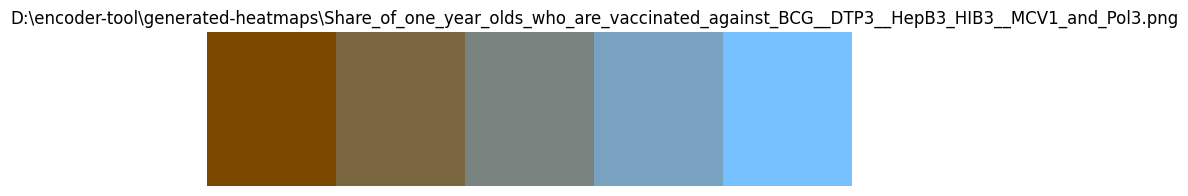

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_one_year_olds_who_are_vaccinated_against_at_least_one_disease__csv.png


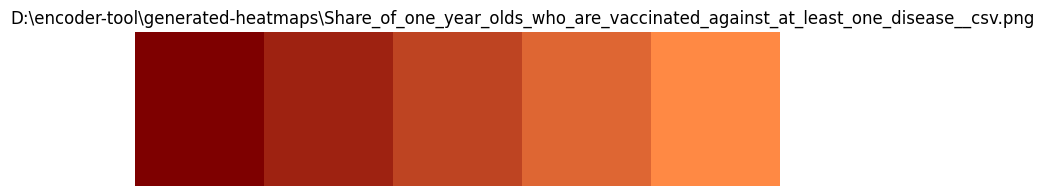

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_tariff_lines_with_specific_rates__manufactured_products____.png


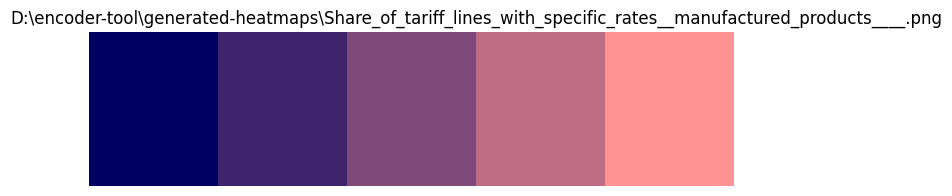

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_youth_not_in_education__employment_or_training__female____of_female_youth_population_.png


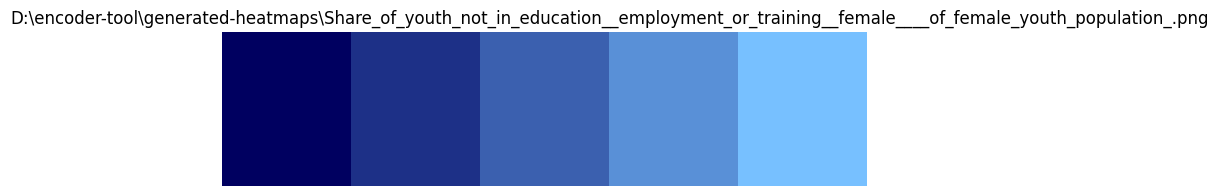

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_youth_not_in_education__employment_or_training__male____of_male_youth_population_.png


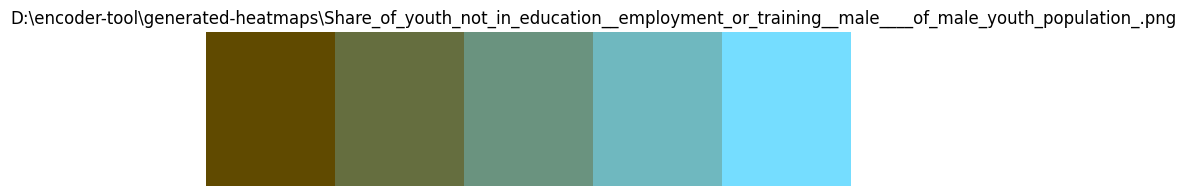

Processing file: D:\encoder-tool\generated-heatmaps\Share_of_youth_not_in_education__employment_or_training__total____of_youth_population_.png


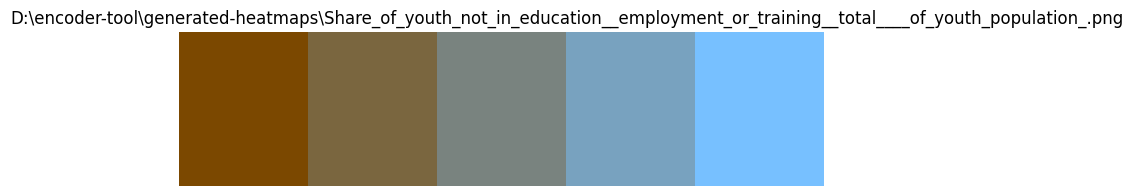

Processing file: D:\encoder-tool\generated-heatmaps\Social_contributions__current_LCU_.png


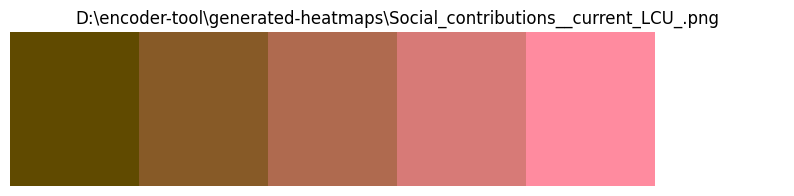

Processing file: D:\encoder-tool\generated-heatmaps\Source_data_assessment_of_statistical_capacity__scale_0___100_.png


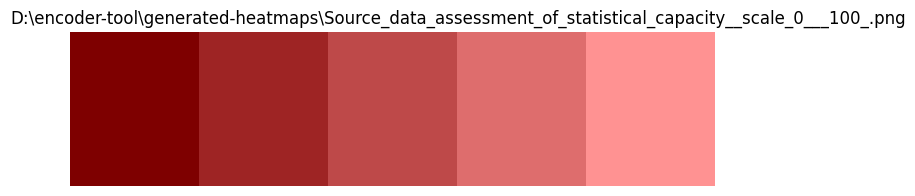

Processing file: D:\encoder-tool\generated-heatmaps\Stocks_traded__turnover_ratio_of_domestic_shares____.png


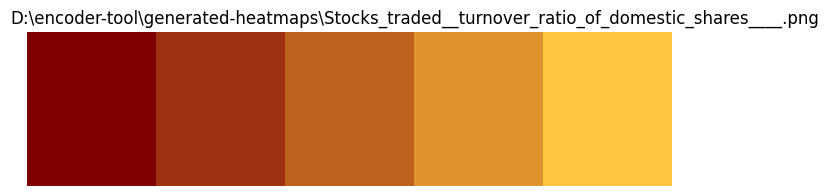

Processing file: D:\encoder-tool\generated-heatmaps\Stomach_cancer_deaths_per_100_000_women.png


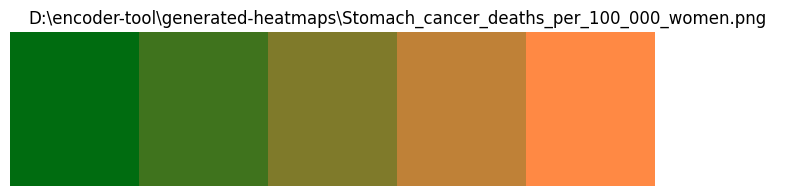

Processing file: D:\encoder-tool\generated-heatmaps\Stomach_cancer_new_cases_per_100_000_men.png


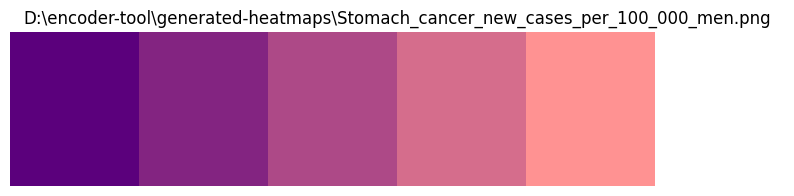

Processing file: D:\encoder-tool\generated-heatmaps\Stomach_cancer_new_cases_per_100_000_women.png


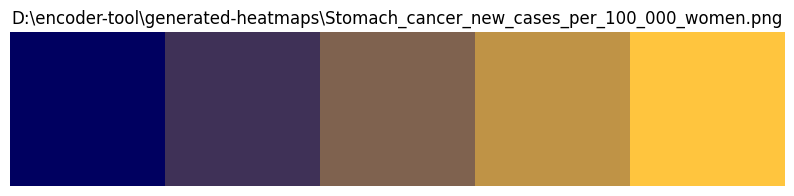

Processing file: D:\encoder-tool\generated-heatmaps\Survival_to_age_65__male____of_cohort_.png


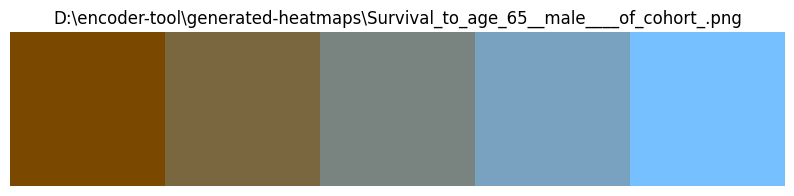

Processing file: D:\encoder-tool\generated-heatmaps\TB_detection_rate______infectious___DOTS_only.png


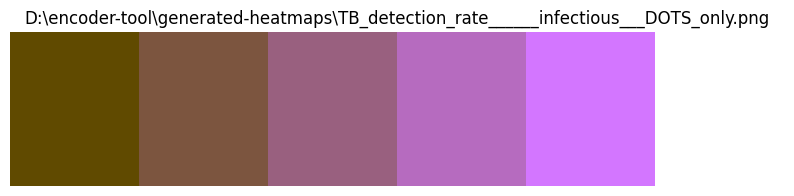

Processing file: D:\encoder-tool\generated-heatmaps\TB_incidence__estimated__all_forms_of_TB.png


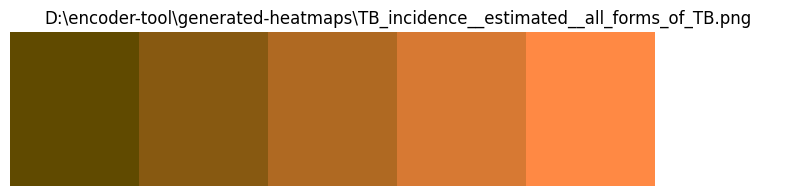

Processing file: D:\encoder-tool\generated-heatmaps\Tariff_rate__applied__weighted_mean__all_products____.png


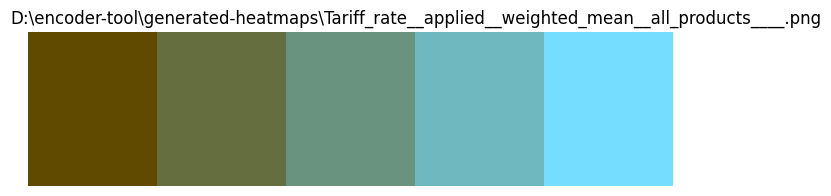

Processing file: D:\encoder-tool\generated-heatmaps\Tariff_rate__applied__weighted_mean__manufactured_products____.png


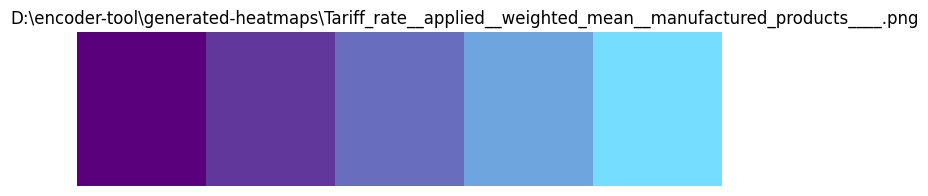

Processing file: D:\encoder-tool\generated-heatmaps\Tax_revenue____of_GDP_.png


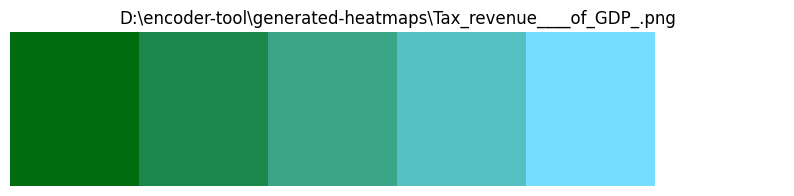

Processing file: D:\encoder-tool\generated-heatmaps\Taxes_on_international_trade__current_LCU_.png


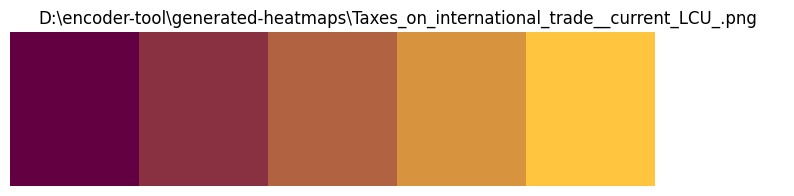

Processing file: D:\encoder-tool\generated-heatmaps\Time_required_to_build_a_warehouse__days_.png


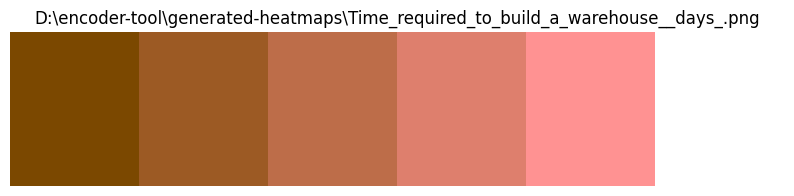

In [38]:
class HeatmapEncoder:

  def __init__(self, input_dir):
    self.input_dir = input_dir
  
  def run_main(self):

    images = sorted(os.listdir(self.input_dir), key=lambda x: [ord(c) for c in x])
    
    for image in images:
      image_path = os.path.join(self.input_dir, image)
      print(f"Processing file: {image_path}")  # Debugging statement
      test = ColorExtractor(image_path)
      test.extract_legend_color()

if __name__ == "__main__":
  input_dir = "D:\\encoder-tool\\generated-heatmaps"
  HeatmapEncoder(input_dir).run_main()